### 분류 classification
- regression : MSE(Mean Square Error) : mean(square(Y:정답 - h:예측))
- classification : Cross Entropy : - Y * log(h),  Y=(0,1)

머신러닝에 필요한 소양 3가지(개인의견)
- 프로그래밍
- 알고리즘
- 수학

In [1]:
import numpy as np

In [3]:
np.log10(0), np.log10(0.001), np.log10(10), np.log10(100), np.log10(1000)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


(-inf, -3.0, 1.0, 2.0, 3.0)

In [5]:
2**2, 2**3, 2**4

(4, 8, 16)

In [8]:
2**-1, 2**-2, 2**-3, 2**-4

(0.5, 0.25, 0.125, 0.0625)

In [11]:
np.log(1), np.log(2.71), np.log(5)

(0.0, 0.99694863489160956, 1.6094379124341003)

In [ ]:
x = np.arange(0.00001, 1, 0.0001) 
y = np.log(x)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

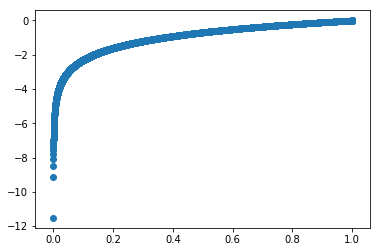

In [23]:
plt.scatter(x, y)

- classification : Cross Entropy : - (Y * log(h) + (1-Y) * log(1-h)),  Y=(0,1)

In [42]:
Y = [0, 1, 0] #정답
h = [0.1, 0.9, 0.7] # 예측
y = np.array(Y)
h = np.array(h)

In [44]:
mae = np.mean(np.abs(y - h))# MAE (평균 절대값 오차)
mse = np.mean(np.square(y - h))#MSE (평균 제곱 오차)
ce = np.mean(-(y * np.log(h) + (1-y) * np.log(1-h))) # 크로스 엔트로피
mae, mse, ce

(0.29999999999999999, 0.16999999999999996, 0.47156461188052951)

In [51]:
y * np.log(h) # y = 1 인 데이터의 오차

array([-0.        , -0.10536052, -0.        ])

In [52]:
(1-y) * np.log(1-h) # y = 0 인 데이터의 오차

array([-0.10536052, -0.        , -1.2039728 ])

In [60]:
y = np.array([0, 0, 0, 1, 1, 1])
h = np.array([0.001, 0.1, 0.9, 0.99999, 0.9, 0.3])# 어디에서 오차가 제일 큰가요?
np.set_printoptions(precision=3, suppress=True)

In [62]:
#  (y=1의 오차) + (y=0의 오차)
- (y * np.log(h) + (1-y) * np.log(1-h))

array([ 0.001,  0.105,  2.303,  0.   ,  0.105,  1.204])

코로나 바이러스/ 분류 / "바이러스가 있냐(1) 없냐(0)"
- 증상 : 발열
- 기침(분당 횟수), 
- 두통 정도(0:정상~10:아프다), 
- 중국방문여부(1:방문, 0:없음)

In [75]:
x = [[37, 3, 3, 0], [39, 5, 7, 1], [36.5, 0, 7, 0], [38, 10, 2, 0], [36.6, 2, 2, 0]]
y = [0, 1, 0, 1, 0]
x_test = [[38, 5, 1, 0], [37, 10, 5, 1]]

logistic regression 모델을 사용해서 위 데이터를 학습시키고 테스트셋을 예측하세요

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression().fit(x,y)
model.predict(x)

array([0, 1, 0, 1, 0])

In [78]:
model.predict(x_test)

array([0, 1])

In [79]:
model.predict_proba(x)

array([[ 0.87 ,  0.13 ],
       [ 0.194,  0.806],
       [ 0.928,  0.072],
       [ 0.034,  0.966],
       [ 0.958,  0.042]])

In [81]:
#해석 : 발열, 기침, 두통, 중국방문
model.coef_, model.intercept_

(array([[-0.154,  0.834,  0.443,  0.194]]), array([-0.017]))

In [88]:
def sigmoid(x): # 점수 score -> 확률 probability(합이 1) 로 변환
    return 1 / (1 + np.exp(-x))

In [89]:
# y = sigmoid(WX + b), 
sigmoid(np.sum(model.coef_ * x, axis=1) + model.intercept_)

array([ 0.13 ,  0.806,  0.072,  0.966,  0.042])